In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import pickle
import utils
import moran_auto
import gmm
import kmeans_utils
import figure_functions
from sklearn.preprocessing import MinMaxScaler
from sklearn import mixture
from sklearn.cluster import KMeans
import csv
from collections import defaultdict

In [2]:
curr_dir = os.getcwd()
data_path = curr_dir + '/../data/'
fig_path = curr_dir + '/../figs/'
results_path = curr_dir + '/../results'
animation_path = curr_dir + '/../animation'

In [3]:
params = utils.load_data(data_path)
gps_loc, avg_loads, park_data, N, P, idx_to_day_hour, day_hour_to_idx = params
park_data_new = utils.load_daily_data(park_data)

In [4]:
time = 7
time1 = 8
time2 = 9
loads = avg_loads

In [12]:
figure_functions.create_animation(loads, gps_loc, N, P, fig_path, animation_path, num_comps=3)

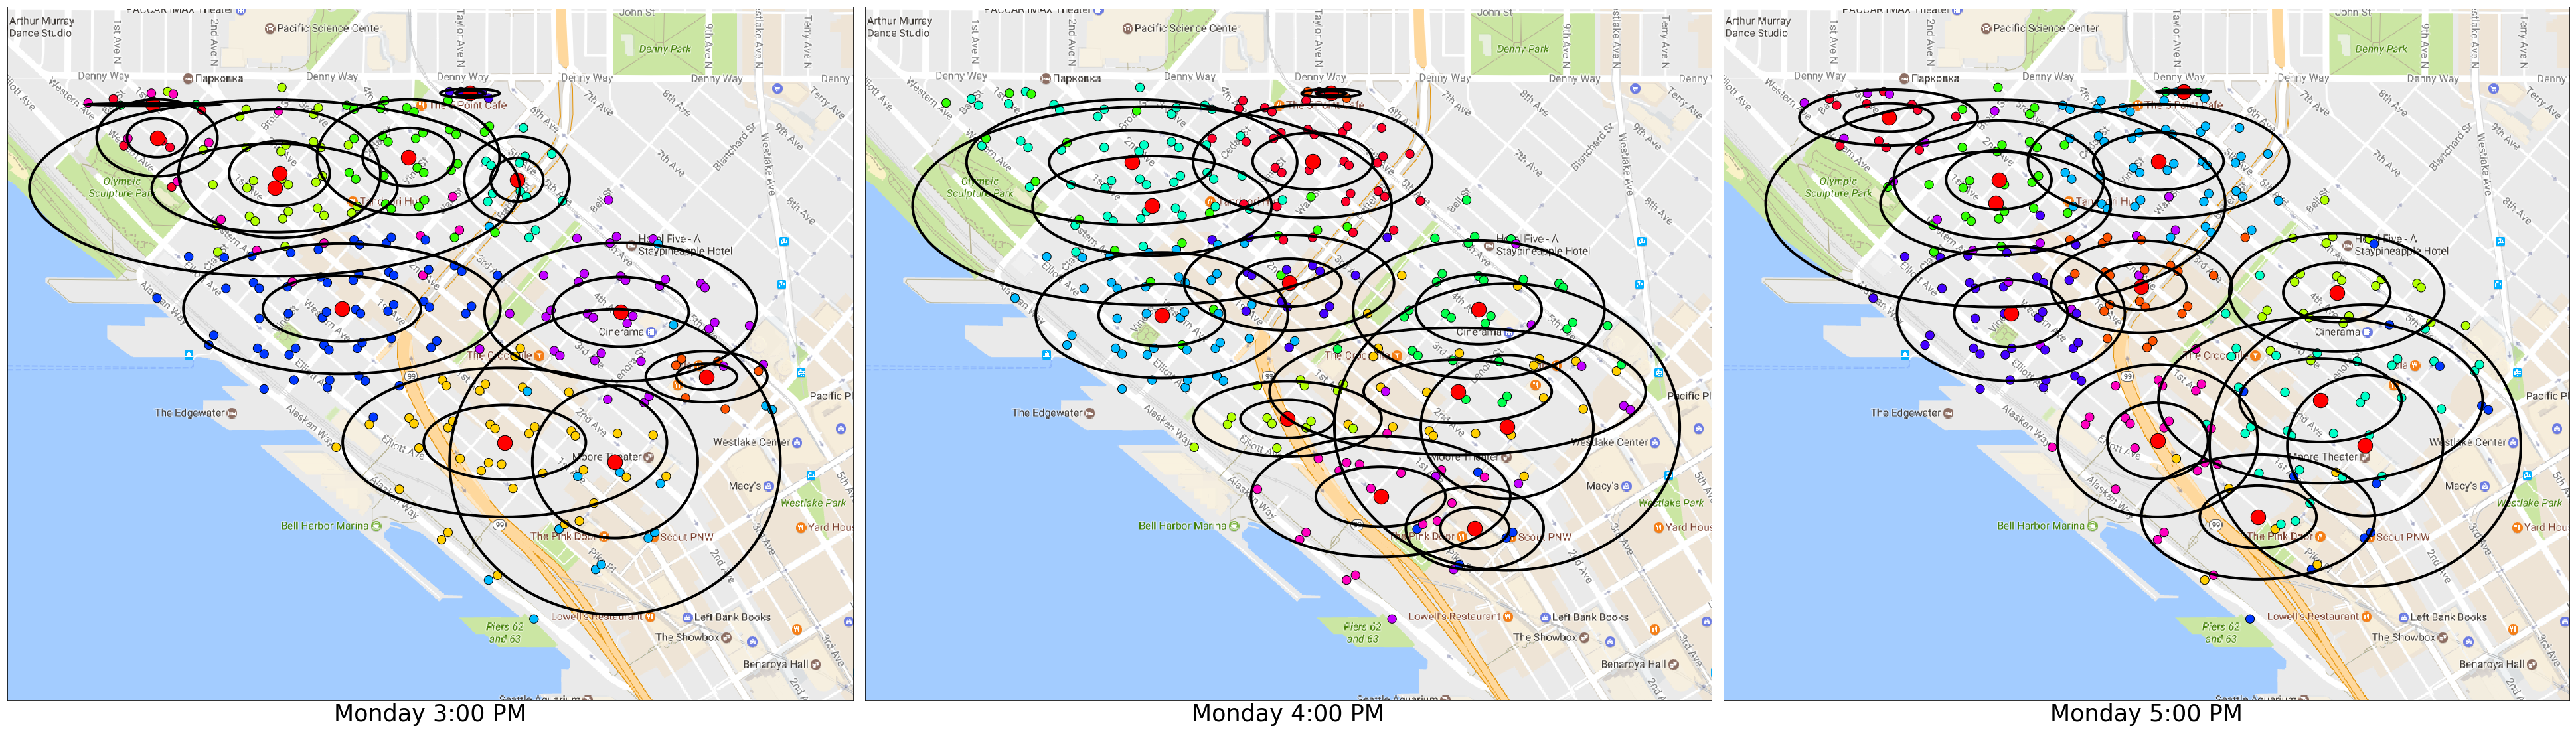

In [10]:
fig, ax = figure_functions.mixture_plot(loads=loads, gps_loc=gps_loc, 
                                        times=[7,8,9], N=N, fig_path=fig_path, 
                                        shape=(1,3), num_comps=12, filename='friday_6pm_gmm.png',
                                        title='')
plt.show()

In [ ]:
fig, ax = figure_functions.mixture_plot(loads=loads, gps_loc=gps_loc, 
                                        times=[time1], N=N, fig_path=fig_path, 
                                        shape=(1,1), filename='friday_10am_gmm.png',
                                        title='')
fig, ax = figure_functions.mixture_plot(loads=loads, gps_loc=gps_loc, 
                                        times=[time2], N=N, fig_path=fig_path, 
                                        shape=(1,1), filename='friday_6pm_gmm.png',
                                        title='')

fig, ax = figure_functions.triangular_grid(loads=loads, gps_loc=gps_loc, time=time,
                                           N=N, fig_path=fig_path)

fig, ax = figure_functions.contour_plot(loads=loads, gps_loc=gps_loc, time=time1,
                                        title='Friday 10:00 AM Average Load Contours', 
                                        N=N, filename='friday_10am.png', fig_path=fig_path, 
                                        contours=10)

fig, ax = figure_functions.contour_plot(loads=loads, gps_loc=gps_loc, time=time2,
                                        title='Friday 6:00 PM Average Load Contours', 
                                        N=N, filename='friday_6pm.png', fig_path=fig_path, 
                                        contours=10)

In [8]:
model_selection = {"likelihood": [], "bic": [], "aic": []} 
min_comps = 1
max_comps = 20

for time in range(P):    
    likelihoods = []
    bics = []
    aics = []

    for num_comps in range(min_comps, max_comps):
        cluster_data = np.hstack((loads[:, time, None], gps_loc))

        scaler = MinMaxScaler().fit(cluster_data)
        cluster_data = scaler.transform(cluster_data)

        gmm = mixture.GaussianMixture(n_init=10, n_components=num_comps, 
                                      covariance_type='diag').fit(cluster_data)

        likelihoods.append(gmm.lower_bound_)
        bics.append(gmm.bic(cluster_data))
        aics.append(gmm.aic(cluster_data))

    model_selection['likelihood'].append(likelihoods)
    model_selection['bic'].append(bics)
    model_selection['aic'].append(aics)  

sns.set()
sns.set_style("whitegrid")

# Likelihood model selection plot.
# plt.figure()
# mean_likelihood = np.mean(np.vstack((model_selection['likelihood'])), axis=0)
# plt.plot(range(min_comps, max_comps), mean_likelihood, 'o-', color='red')
# plt.axvline(x=5, color='black')
# plt.axvline(x=10, color='black')
# plt.axvline(x=15, color='black')
# plt.axvline(x=20, color='black')
# plt.axvline(x=25, color='black')
# plt.xlabel('Number of Components')
# plt.ylabel('Likelihood')
# plt.title('Likelihood Model Selection')
# plt.savefig(os.path.join(fig_path, 'likelihood_model.png'))

# # BIC model selection plot.
# plt.figure()
# mean_bic = np.mean(np.vstack((model_selection['bic'])), axis=0)
# plt.plot(range(min_comps, max_comps), mean_bic, 'o-', color='red')
# plt.axvline(x=5, color='black')
# plt.axvline(x=10, color='black')
# plt.axvline(x=15, color='black')
# plt.axvline(x=20, color='black')
# plt.axvline(x=25, color='black')
# plt.xlabel('Number of Components')
# plt.ylabel('BIC')
# plt.title('BIC Model Selection')
# plt.savefig(os.path.join(fig_path, 'bic_model.png'))

# # AIC model selection plot.
# plt.figure()
# mean_aic = np.mean(np.vstack((model_selection['aic'])), axis=0)
# plt.plot(range(min_comps, max_comps), mean_aic, 'o-', color='red')
# plt.axvline(x=5, color='black')
# plt.axvline(x=10, color='black')
# plt.axvline(x=15, color='black')
# plt.axvline(x=20, color='black')
# plt.axvline(x=25, color='black')
# plt.xlabel('Number of Components')
# plt.ylabel('AIC')
# plt.title('AIC Model Selection')
# plt.savefig(os.path.join(fig_path, 'aic_model.png'))  

# sns.reset_orig()

NameError: name 'sns' is not defined

In [ ]:
model_selection['bic']

# Train and Test GMM

In [ ]:
park_data, gps_loc, N = utils.load_daily_data(data_path)

In [ ]:
check = np.array(sorted(park_data['Load'].values.tolist(), reverse=True))

In [ ]:
len(np.where(check > 1.5)[0])/float(len(check)) * 100

In [ ]:
pd.DataFrame(range(10), index=range(10), columns=['check'])

In [ ]:
results = gmm.locational_demand_analysis(park_data, gps_loc, N)

In [ ]:
days = [result[0] for result in results]
hours = [result[1] for result in results]
errors = [result[2] for result in results]
morans_mix = [result[3] for result in results]
morans_adj = [result[4] for result in results]
means = [result[5] for result in results]

In [ ]:
scores, times = kmeans_utils.get_time_scores(means)

In [ ]:
best_times = {}
best_days = {}
for time in times:
    day = time/12
    hour = time%12 + 8
    if hour not in best_times:
        best_times[hour] = time
    if day not in best_days and hour not in [8, 15,16,17]:
        print day, hour
        best_days[day] = time

In [ ]:
good_times = []

for time in times:
    if time % 12 + 8 in [8,9]:
        continue
        
    good_times.append(time)
    data = np.vstack((means[time]))
    kmeans = KMeans(n_clusters=3).fit(data)
    labels = kmeans.labels_.tolist()

In [ ]:
good_times = best_days.values()

In [ ]:
fig, ax = figure_functions.centroid_plots(means, gps_loc, N, times=good_times, fig_path=fig_path, shape=(2,3))